## **Linear Regression**
We will use Linear regression for predicting house prices

We are using a Kaggle dataset- https://www.kaggle.com/harlfoxem/housesalesprediction

In [ ]:
# Lets import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### **Dataset Preparation**

In [ ]:
# Execute this cell for loading dataset in a pandas dataframe
from IPython.display import clear_output
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct' -O Linear_regression_dataset

data_df = pd.read_csv("Linear_regression_dataset")

--2024-05-20 15:22:31--  https://docs.google.com/uc?export=download&id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct
Resolving docs.google.com (docs.google.com)... 74.125.142.113, 74.125.142.139, 74.125.142.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.142.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download [following]
--2024-05-20 15:22:31--  https://drive.usercontent.google.com/download?id=16x6-8Znn2T50zFwVvKlzsdN7Jd1hpjct&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.202.132, 2607:f8b0:400e:c00::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.202.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [application/octet-stream]
Saving to: ‘Linear_regression_dataset’

Linear_regression_d 100%[===================>]   2.40M  

In [ ]:
# Lets have a quick Look at dataset

print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()


(No of rows, No of Columns) =  (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


So there are **19** features (of course we will not use id as feature :) ), and 1 variable to predict(price)

But note that the **date** column contain strings so first we will remove T00.. part from it and than convert it to numpy array.

In [ ]:
data_df['date'] = data_df['date'].str.replace('T000000', '')                         # Remove T000000 part from data column. Hint: search about .str.replace() method. :)
df=data_df.astype(float)
df = df.drop('id', axis=1)
convert_dict = {'date': int}
data_array =  df.to_numpy()                                         # Create a numpy array which does not have "id" field
assert (data_array.shape == (21613,20))

df = df.astype(convert_dict)
data_df.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Now the next task is **normalization**.

We will scale each column of dataset by x -> (x-u)/s

where u is mean(x), and s is standard deviation of u

In [ ]:
mean = (df.mean(axis=0)).to_numpy()                                 # this should be an array, each entry should be mean of a column
sd = (df.std(axis=0)).to_numpy()                                  # this should be an array, each entry should be standard deviation of a column

data_array_norm = (data_array - mean)/sd

print(data_array_norm.shape)

(21613, 20)


The last step is to make train and test dataset and to create seperate vector for price

In [ ]:
labels = data_df.loc[:, "price"]  # extract the price column from data

x_array_norm = np.delete(data_array_norm, 2, axis=1)  # delete the price column from data_array_norm. Hint: use np.delete()

x_train, x_test, y_train, y_test = train_test_split(
    x_array_norm,
    labels,
    test_size=0.15,
    random_state=42,
    shuffle=True,
)  #

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(18371, 19) (3242, 19) (18371,) (3242,)


### **Loss and gradient descent**
We will use mean squared error(MSE) as loss

Use the gradient descent algorithm which you learned from tutorials

Your task is to complete the following functions

In [ ]:
def loss(y_pred,y_true):
  """
  input:
  y_pred = [array] predicted value of y
  y_true = [array] ground truth

  output:
  mse: [scalar] the MES loss
  """
  mse =np.mean(np.square(y_pred-y_true))                  # fill code here

  return mse

In [ ]:
def y(x,a,b):
  """
  This function should return predicted value of y = ax+b
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias

  output:
  y_pred: [array] predicted value of y of shape (m,)
  """

  m,n = x.shape
  y_pred =np.dot(x,a.T)+b          # fill code here

  assert(y_pred.shape == (m,))
  return y_pred

In [ ]:
def gradient(x,a,b,y_true):
  """
  This function shoud return gradient of loss
  input:
  x: [array] the feature vector of shape (m,n)
  a: [array] weights of shape (n,)
  b: [scalar] bias
  y_true: [array] ground truth of shape (m,)

  output:
  grad: [tuple] a tuple (derivative with respect to a[array of shape(n,)], derivative with respect to b[scalar])
  """
  m,n = x.shape
  yp = y(x,a,b)
  loss1=loss(yp,y_true)
  da = (2*np.dot(x.T,y_true-yp)/m   )*-1              # write code to calculate derivative of loss with respect to a
  db = (2*(np.mean(y_true-yp))        )              # write code to calculate derivative of loss with respect to b

  assert(da.shape ==(n,))
  return (da,db)

In [ ]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
  """
  This function perfroms gradient descent and minimizes loss
  input:
  x: [array] the feature vector of shape (m,n)
  y_true: [array] ground truth of shape (m,)

  output:
  loss: [array] of size (epochs,)
  weights: [tuple] (a,b)
  """
  m,n = x.shape
  loss_mse = []                                 # initialize empty list to store loss
  a =np.random.random((n,))                                    # initialize a- weights and b- bias
  b = 0

  for i in range(epochs):
    # calculate derivative using gradient() function
    # apply gradient descent now to update a and b
    da,db=gradient (x,a,b,y_true)
    a=a-learning_rate*da
    b=b-learning_rate*db
    l_mse =loss(y(x,a,b),y_true)                           # calculate loss at this point
    loss_mse.append(l_mse)

    print("Epoch ",i+1," Completed!","loss = ",l_mse)

  print("Training completed!!")

  assert(a.shape==(n,))

  return (loss_mse,a,b)

### **Training**

In [ ]:
epochs = 25            # tweak this!!!
learn_rate =0.089          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train,y_train,learn_rate,epochs)

Epoch  1  Completed! loss =  441760590027.94684
Epoch  2  Completed! loss =  587330951765.444
Epoch  3  Completed! loss =  799051343698.7738
Epoch  4  Completed! loss =  1096988553775.883
Epoch  5  Completed! loss =  1512595618995.7798
Epoch  6  Completed! loss =  2090697633722.8594
Epoch  7  Completed! loss =  2893917834156.809
Epoch  8  Completed! loss =  4009318220932.002
Epoch  9  Completed! loss =  5557781680531.326
Epoch  10  Completed! loss =  7707088122152.667
Epoch  11  Completed! loss =  10690079673272.756
Epoch  12  Completed! loss =  14829875153037.723
Epoch  13  Completed! loss =  20574862095474.71
Epoch  14  Completed! loss =  28547254991507.023
Epoch  15  Completed! loss =  39610478076159.055
Epoch  16  Completed! loss =  54962669749550.65
Epoch  17  Completed! loss =  76266434601832.31
Epoch  18  Completed! loss =  105828894440574.27
Epoch  19  Completed! loss =  146851536821021.78
Epoch  20  Completed! loss =  203776918253600.84
Epoch  21  Completed! loss =  2827697680

### **Evaluation and Visualization**
Lets plot how loss varies with epochs


Loss on test data =  1049605045010595.2


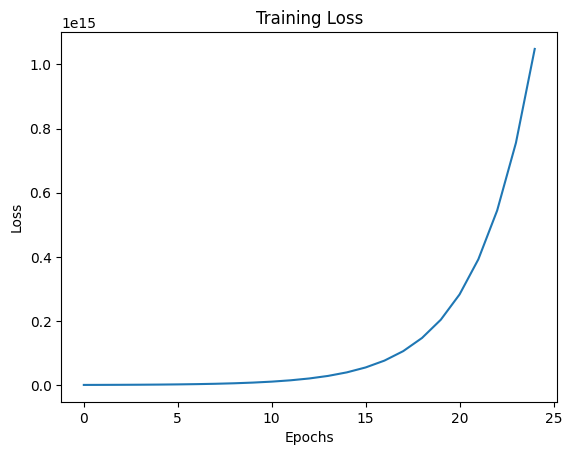

In [ ]:
test_loss = loss(y(x_test,a,b),y_test)

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot(train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [ ]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 [==============================] - 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 9       8       9       8       1       

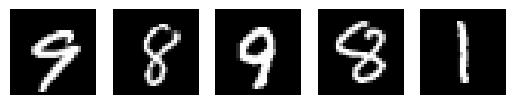

In [ ]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [ ]:
# Flatten the images into 1-d vectors

x_train_flatten = x_train.reshape(60000,784)                                   # flatten the images of training set
x_test_flatten =x_test.reshape(10000,784)                                      # flatten th eimages of test set


# Divide the training data into training and validation data....

n_validation = 10000                                        # choose number of images to be used for validation

x_validation =x_train_flatten[0:10000,:]
y_validation =y_train[0:10000]

x_train_flatten = x_train_flatten[10000:60000,:]
y_train = y_train[10000:60000]


### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [ ]:
model = keras.models.Sequential([
    ...
])

# Make a graphical representation of the model...
keras.utils.plot_model(model,show_shapes=True)
model.summary

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [ ]:
model.compile(optimizer="...",loss = "...",metrics=["accuracy"])

n_epochs = ...              # set number of epochs
batch_size = 512            # you can tweak with these parametrs
history = model.fit(...)

### **Evaluate**
Evaluate your model on test data.

And Show some results

In [ ]:
results = model.evaluate(...)
print("Loss = ",results[0])
print("Accuracy = ",results[1]*100,"%")

# Plot Accuracy...
plt.plot(..., label="Training accuracy")
plt.plot(..., label="validation Accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Similarly write code to plot loss...
...


Lets show our results on images from testing dataset

In [ ]:
n = ...   # = no. of images to see predictions on

index = np.random.choice(...)  # choose random index from test data
print("label: ")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(...)             # fill code to show images from test set
    plt.axis("off")
    print(y_test[ind],end="       ")

plt.show()
print("Predicted value: ")

# Now lets print the predictions

for i,ind in enumerate(index):
    # write code to predict and print digit in image
    # Hint: the output of the model is a 10-d vector which gives probabilties
    # The digit in the image would be the class for which probability is hghest...

    digit = ...
    print(digit,end="      ")